In [11]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

In [12]:
class LinearRegression:
    def __init__(self, data):
        self.data = data
        self.n = len(data)
        self.model = gp.Model('Linear Regression')
        #loại liên tục
        self.a = self.model.addVar(
                                  vtype=GRB.CONTINUOUS,
                                   name='a')
        self.b = self.model.addVar(
                                    vtype=GRB.CONTINUOUS,
                                    name='b')
    def setObjective(self):
        self.model.setObjective(
                                gp.quicksum(
                                    (self.data[i][1]-self.a*self.data[i][0]-self.b)**2 
                                    for i in range(self.n)),
                                GRB.MINIMIZE)
    def solve(self):
        self.setObjective()
        self.model.optimize()
        

In [13]:
#tạo dữ liệu độ dài 10, random quanh đường thẳng y = 2x 
data = [ [i, 2*i + np.random.normal(0, 1)] for i in range(10)]
data = np.array(data)
print(data)

[[ 0.         -0.15802196]
 [ 1.          1.68891617]
 [ 2.          2.73140145]
 [ 3.          5.99388846]
 [ 4.          8.36623527]
 [ 5.         10.98276514]
 [ 6.         11.82153638]
 [ 7.         13.54053282]
 [ 8.         15.46831498]
 [ 9.         19.72655994]]


In [14]:
linearRegression = LinearRegression(data)
linearRegression.solve()
print('a = ', linearRegression.a.x)
print('b = ', linearRegression.b.x)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-5600U CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0x02f3d27f
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [2e+02, 1e+03]
  QObjective range [2e+01, 6e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.01s
Presolved: 0 rows, 2 columns, 0 nonzeros
Presolved model has 3 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 1
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.02399295e+06 -1.79732672e+05  1.04e+

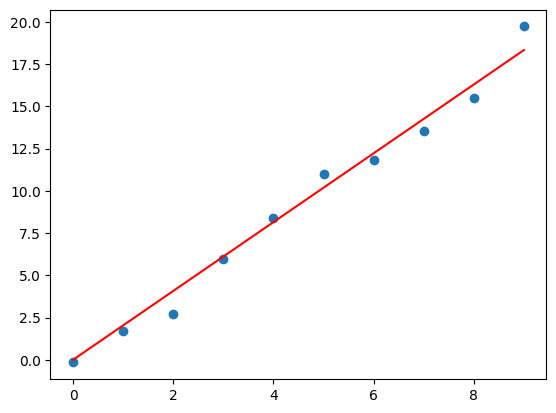

In [16]:
#plot dữ liệu
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1])
#x từ min(data[:, 0]) đến max(data[:, 0])
x = np.linspace(min(data[:, 0]), max(data[:, 0]), 100)
y = linearRegression.a.x*x + linearRegression.b.x
plt.plot(x, y, 'r')
plt.show()
